This file creates a plot for each weekday, representing average amount of freestanding bikes found at given time

In [1]:
import json
import math
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statistics import median

# If this is True, the plot will be crated for area surrounding Belwederska street
BELWEDERSKA = True

In [2]:
def haversine(lat1, lng1, lat2, lng2):
    d_lat = (lat2 - lat1) * math.pi / 180.0
    d_lon = (lng2 - lng1) * math.pi / 180.0
    lat1 = lat1 * math.pi / 180.0
    lat2 = lat2 * math.pi / 180.0
    a = (pow(math.sin(d_lat / 2), 2) +
         pow(math.sin(d_lon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c * 1000

In [3]:
def vistula_green_stands(lat: float, lng: float) -> bool:
    stands = [
        [52.261051, 21.007217],
        [52.259663, 21.008480],
        [52.257838, 21.010142],
        [52.256369, 21.011499],
        [52.255580, 21.012176],
        [52.255249, 21.012455],
        [52.254748, 21.012957],
        [52.254111, 21.013517],
        [52.253642, 21.013964],
        [52.252824, 21.014499],
        [52.252397, 21.015083],
        [52.251268, 21.016166],
        [52.250765, 21.016703],
        [52.250077, 21.017476],
        [52.249273, 21.018348],
        [52.248789, 21.018772],
        [52.247394, 21.020547],
        [52.247192, 21.020844],
        [52.246941, 21.021308],
        [52.246575, 21.021729],
        [52.246114, 21.022454],
        [52.245939, 21.022547],
        [52.245729, 21.022955],
        [52.245629, 21.023304],
        [52.244528, 21.025278],
        [52.243644, 21.026940],
        [52.243372, 21.026275],
        [52.243336, 21.026327],
        [52.242668, 21.027555],
        [52.242861, 21.027308],
        [52.242807, 21.027775],
        [52.241917, 21.029937],
        [52.240956, 21.031317],
        [52.241086, 21.030963],
        [52.240099, 21.032596],
        [52.239730, 21.033034],
    ]
    for stand_lat, stand_lng in stands:
        if haversine(lat, lng, stand_lat, stand_lng) < 46:
            return True
    return False
    

In [4]:
def two_hours_forward(timestamp_string: str):
    date, time = timestamp_string.split(' ')
    year, month, day = date.split('-')
    hour, minute, second = time.split(':')
    date = datetime.datetime(int(year), int(month), int(day), int(hour), int(minute), int(second))
    date += datetime.timedelta(hours=2)
    return date

In [5]:
# extracts weekday of datetime given in YYYY-MM-DD hh.mm.ss format
def get_weekday(timestamp_string: str):
    weekday_names_dict = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    extracted_date = timestamp_string[:10]
    date_list = extracted_date.split('-')
    year, month, day = int(date_list[0]), int(date_list[1]) , int(date_list[2])
    extracted_date = datetime.datetime(year, month, day)
    return weekday_names_dict[extracted_date.weekday()]

In [6]:
# extracts time of datetime given in YYYY-MM-DD hh.mm.ss format
def extract_time(timestamp_string: str):
    return timestamp_string[11:16].replace('.', ':')

In [7]:
def five_minutes_forward(given_time: str):
    hours = int(given_time[:2])
    minutes = int(given_time[3:])
    if minutes != 55:
        minutes += 5
        minutes = f"{minutes:02}"
    else:
        hours += 1
        minutes = '00'
    hours = f"{hours:02}"
    return str(hours) + ':' + str(minutes)

In [8]:
all_timestamps = {}
start = '00:00'
while start != '24:00':
    all_timestamps[start] = []
    start = five_minutes_forward(start)

timestamp_dictionary = dict()
data = {'monday': {},
        'tuesday': {},
        'wednesday': {},
        'thursday': {},
        'friday': {},
        'saturday': {},
        'sunday': {}}


for key in data.keys():
    all_timestamps = {}
    start = '00:00'
    while start != '24:00':
        all_timestamps[start] = []
        start = five_minutes_forward(start)
    data[key]['timestamps'] = all_timestamps

i = 0
timestamp = ''
# Extracting stations info for stations in Warsaw
with open('json_files/2024-july-aug-veturilo.json', 'r', encoding='utf8') as file:
    for line in file:
        # if i <= 3:
            # print(line)
            # print('-----')
        i += 1
        data_piece = json.loads(line)
        if str(two_hours_forward(data_piece['timestamp']['$date'].replace('T', ' ')[:-1])).replace(':', '.') != timestamp:
            timestamp = str(two_hours_forward(data_piece['timestamp']['$date'].replace('T', ' ')[:-1])).replace(':', '.')
            print(timestamp)
            weekday = get_weekday(timestamp[:10])
            time = extract_time(timestamp)
            data[weekday]['timestamps'][time].append(0)
        # geographical conditions here!!
        if data_piece['bike'] and vistula_green_stands(data_piece['lat'], data_piece['lng']):
            if not timestamp in timestamp_dictionary.keys():
                timestamp_dictionary[timestamp] = []
            timestamp_dictionary[timestamp].append(data_piece)
    

2024-06-30 00.00.00
2024-06-30 00.05.00
2024-06-30 00.10.00
2024-06-30 00.15.00
2024-06-30 00.20.00
2024-06-30 00.25.00
2024-06-30 00.30.00
2024-06-30 00.35.00
2024-06-30 00.40.00
2024-06-30 00.45.00
2024-06-30 00.50.00
2024-06-30 00.55.00
2024-06-30 01.00.00
2024-06-30 01.05.00
2024-06-30 01.10.00
2024-06-30 01.15.00
2024-06-30 01.20.00
2024-06-30 01.25.00
2024-06-30 01.30.00
2024-06-30 01.35.00
2024-06-30 01.40.00
2024-06-30 01.45.00
2024-06-30 01.50.00
2024-06-30 01.55.00
2024-06-30 02.00.00
2024-06-30 02.05.00
2024-06-30 02.10.00
2024-06-30 02.15.00
2024-06-30 02.20.00
2024-06-30 02.25.00
2024-06-30 02.30.00
2024-06-30 02.35.00
2024-06-30 02.40.00
2024-06-30 02.45.00
2024-06-30 02.50.00
2024-06-30 02.55.00
2024-06-30 03.00.00
2024-06-30 03.05.00
2024-06-30 03.10.00
2024-06-30 03.15.00
2024-06-30 03.20.00
2024-06-30 03.25.00
2024-06-30 03.30.00
2024-06-30 03.35.00
2024-06-30 03.40.00
2024-06-30 03.45.00
2024-06-30 03.50.00
2024-06-30 03.55.00
2024-06-30 04.00.00
2024-06-30 04.05.00


In [9]:
replacement_data = {'monday': {},
        'tuesday': {},
        'wednesday': {},
        'thursday': {},
        'friday': {},
        'saturday': {},
        'sunday': {}}

for timestamp in timestamp_dictionary:
    date = timestamp[:10]
    weekday = get_weekday(date)
    time = timestamp[11:16].replace('.', ':')
    if time not in replacement_data[weekday].keys():
        replacement_data[weekday][time] = [len(timestamp_dictionary[timestamp])]
    else:
        replacement_data[weekday][time].append(len(timestamp_dictionary[timestamp]))

In [10]:
edited_data = data.copy()
for weekday in replacement_data:
    for time in replacement_data[weekday]:
        added_positions = len(replacement_data[weekday][time])
        edited_data[weekday]['timestamps'][time] += replacement_data[weekday][time]
        for i in range(added_positions):
            edited_data[weekday]['timestamps'][time].remove(0)

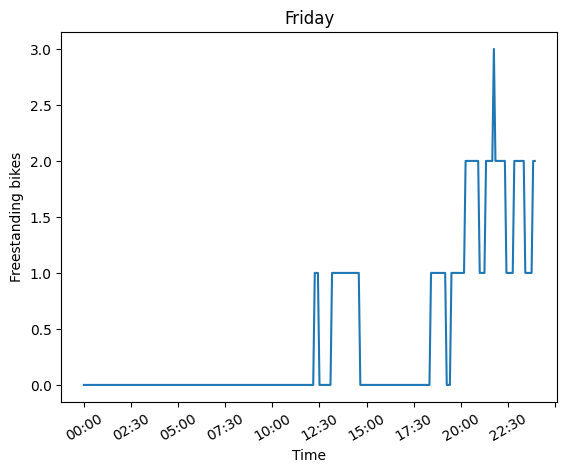

In [13]:
selected_weekday = 'friday'
di1 = []
di2 = []
for key, value in edited_data[selected_weekday.lower()]['timestamps'].items():
    di1.append(key)
    di2.append(median(value))
    
plt.plot(di1, di2)
plt.title(selected_weekday.capitalize())
plt.xlabel("Time")
plt.ylabel("Freestanding bikes")
plt.tick_params(axis='x', labelrotation = 30)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=11))
plt.show()

In [14]:
data

{'monday': {'timestamps': {'00:00': [0, 0, 0, 0, 0, 0, 0, 0, 1],
   '00:05': [0, 0, 0, 0, 0, 0, 0, 1, 2],
   '00:10': [0, 0, 0, 0, 0, 0, 0, 1, 3],
   '00:15': [0, 0, 0, 0, 0, 0, 0, 1, 3],
   '00:20': [0, 0, 0, 0, 0, 0, 0, 0, 3],
   '00:25': [0, 0, 0, 0, 0, 0, 0, 0, 3],
   '00:30': [0, 0, 0, 0, 0, 0, 0, 0, 3],
   '00:35': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '00:40': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '00:45': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '00:50': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '00:55': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:00': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:05': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:10': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:15': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:20': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:25': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:30': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:35': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:40': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:45': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:50': [0, 0, 0, 0, 0, 0, 0, 0, 2],
   '01:55': [0, 0, 0, 0, 0, 0, 0,

[0.7777777777777778,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.5555555555555556,
 0.5555555555555556,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.5555555555555556,
 0.5555555555555556,
 0.3333333333333333,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.5555555555555556,
 0.5555555555555556,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.4444444444